# Ch1 - Exploratory Data Analysis

In [1]:
# Adding code folder to our system path for easier import
import sys
sys.path.append('C:\\Users\\randy\\Documents\\GitHub\\ThinkStats2\\code')

In [2]:
import os
os.getcwd()

'C:\\Users\\randy\\Documents\\GitHub\\ThinkStats2'

In [3]:
os.chdir('C:\\Users\\randy\\Documents\\GitHub\\ThinkStats2\\code')

In [62]:
import nsfg

In [12]:
df = nsfg.ReadFemPreg()

In [13]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [ ]:
df.columns

In [ ]:
df.outcome.value_counts(sort=False)

In [14]:
caseid = 10229
preg_map = nsfg.MakePregMap(df)
indices = preg_map[caseid]
df.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

# Ch2 - Distributions

In [24]:
t = [2,4,4,4,6,6,7,8,9]

In [27]:
hist = {}
for x in t:
    # hist.get() used to grab stored freq value if num was already counted
    hist[x] = hist.get(x, 0) + 1

In [28]:
hist

{2: 1, 4: 3, 6: 2, 7: 1, 8: 1, 9: 1}

In [29]:
import thinkstats2

In [30]:
hist = thinkstats2.Hist([1,2,2,3,5])

In [31]:
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [32]:
hist.Freq(2)

2

In [33]:
sorted(hist.Values())

[1, 2, 3, 5]

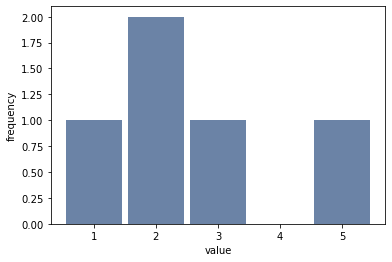

<Figure size 576x432 with 0 Axes>

In [34]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [35]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

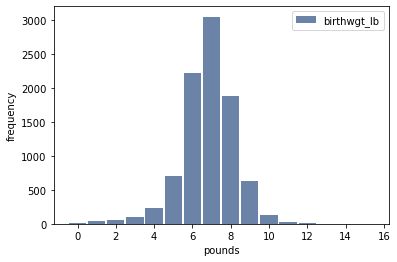

<Figure size 576x432 with 0 Axes>

In [36]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

In [40]:
hist.Smallest(10)

[(0.0, 8),
 (1.0, 40),
 (2.0, 53),
 (3.0, 98),
 (4.0, 229),
 (5.0, 697),
 (6.0, 2223),
 (7.0, 3049),
 (8.0, 1889),
 (9.0, 623)]

In [42]:
firsts = live[live.birthord==1]
others = live[live.birthord != 1]

In [43]:
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

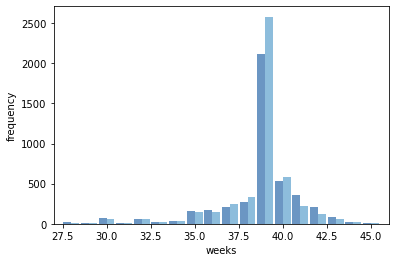

<Figure size 576x432 with 0 Axes>

In [44]:
width = 0.45 # bar width
thinkplot.PrePlot(2) # number of histograms to plot
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27,46])

# Ch3 PMFs

In [49]:
# pmf function - getting normalized prob for each value to occur in hist
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n

In [50]:
# need to renormalize pmf if we change the value probs
# pmf.Normalize()

NameError: name 'first_pmf' is not defined

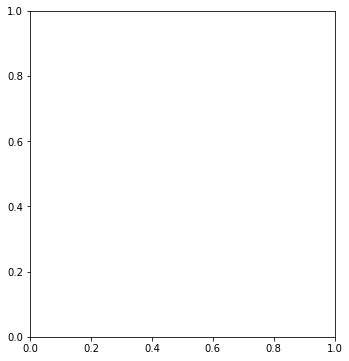

In [51]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2) # makes a grid of figures
thinkplot.SubPlot(2) # switches to the second figure
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)
# axis option ensures the figures are on the same axes for comparison

# Ch4 CDFs

Percentile rank = fraction of samples lower than the chosen value

Percentile = takes a percentile rank and cmoputes the corresponding value

In [57]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [58]:
samp = [1,2,2,3,5]

In [60]:
EvalCdf(samp, 3)

0.8

In [63]:
live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')

NameError: name 'first' is not defined

In [ ]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

In [65]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

In [68]:
import numpy as np
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

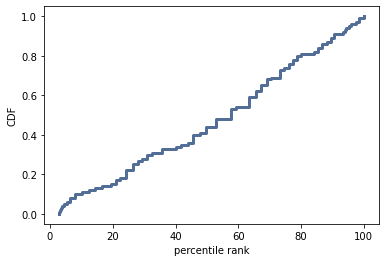

<Figure size 576x432 with 0 Axes>

In [72]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')